In [10]:
from config import config
from LV import ASVSpoof2019LA_Dataset
from torch.utils.data import DataLoader
from audio_cnn import AudioModel
import torch
from sklearn import metrics

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Load train data loaders
val_dataset = ASVSpoof2019LA_Dataset(root_dir=config['root_dir'], mode = 'val')
val_loader = DataLoader(val_dataset, batch_size=1, shuffle=True)

model1 = AudioModel(2048,1).to(device)
model1.load_state_dict(torch.load('./best_.pth'))

model2 = AudioModel(2048,1).to(device)
model2.load_state_dict(torch.load('./best_.pth'))

def test(test_loader, model):
    model.eval()
    true_labels = []
    pred = []
    with torch.no_grad():
        for sample in test_loader:
            inputs, sr, labels = sample
            inputs = inputs.to(device)
            #labels = labels.to(device)
            true_labels.append(labels.cpu())

            #gather outputs
            outputs = model(inputs).squeeze(1).cpu()
            #outputs = (outputs>0.5).float()
            pred.append(outputs)
    return true_labels, pred


STFT kernels created, time used = 0.0690 seconds
STFT kernels created, time used = 0.0625 seconds


In [11]:
true1,pred1 = test(val_loader, model1)
true2,pred2 = test(val_loader, model2)

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(accuracy_score(true1,pred1))
print(accuracy_score(true2,pred2))

print(precision_score(true1,pred1))
print(precision_score(true2,pred2))

print(recall_score(true1,pred1))
print(recall_score(true2,pred2))

print(f1_score(true1,pred1))
print(f1_score(true2,pred2))

0.868
0.87
0.8739837398373984
0.8969957081545065
0.86
0.836
0.8669354838709677
0.865424430641822


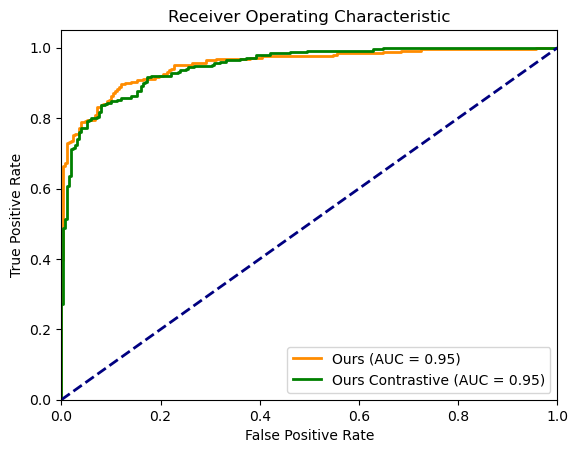

In [13]:
import matplotlib.pyplot as plt

fpr_model1, tpr_model1, _ = metrics.roc_curve(true1,pred1)
roc_auc_model1 = metrics.auc(fpr_model1, tpr_model1)

fpr_model2, tpr_model2, _ = metrics.roc_curve(true2,pred2)
roc_auc_model2 = metrics.auc(fpr_model2, tpr_model2)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr_model1, tpr_model1, color='darkorange',
         lw=lw, label='Ours (AUC = %0.2f)' % roc_auc_model1)
plt.plot(fpr_model2, tpr_model2, color='green',
         lw=lw, label='Ours Contrastive (AUC = %0.2f)' % roc_auc_model2)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('fig.png', bbox_inches='tight', pad_inches=0, dpi=400)
plt.show()